In [1]:
import re
import string
import math
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_excel('train.xlsx', )

In [3]:
pd.set_option('display.max_columns', 22)
pd.set_option('display.precision', 2)

In [4]:
train.head()

,Id,Category,Topic,Source,Headline,Text,Link
0,1,Fake,Education,El Ruinaversal,"RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...","RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...",http://www.elruinaversal.com/2017/06/10/rae-in...
1,2,Fake,Education,Hay noticia,"La palabra ""haiga"", aceptada por la RAE","La palabra ""haiga"", aceptada por la RAE La Rea...",https://haynoticia.es/la-palabra-haiga-aceptad...
2,3,Fake,Education,El Ruinaversal,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,http://www.elruinaversal.com/2018/05/06/yordi-...
3,4,True,Education,EL UNIVERSAL,UNAM capacitará a maestros para aprobar prueba...,UNAM capacitará a maestros para aprobar prueba...,http://www.eluniversal.com.mx/articulo/nacion/...
4,5,Fake,Education,Lamula,pretenden aprobar libros escolares con conteni...,Alerta: pretenden aprobar libros escolares con...,https://redaccion.lamula.pe/2018/06/19/memoria...


In [5]:
train.shape

(676, 7)

In [6]:
train.columns

Index(['Id', 'Category', 'Topic', 'Source', 'Headline', 'Text', 'Link'], dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 7 columns):
Id          676 non-null int64
Category    676 non-null object
Topic       676 non-null object
Source      676 non-null object
Headline    676 non-null object
Text        676 non-null object
Link        676 non-null object
dtypes: int64(1), object(6)
memory usage: 37.1+ KB


In [8]:
train.describe()

,Id
count,676.00
mean,338.50
std,195.29
min,1.00
25%,169.75
50%,338.50
75%,507.25
max,676.00


In [9]:
train['Category'].value_counts()

True    338
Fake    338
Name: Category, dtype: int64

In [10]:
train['Category'].value_counts(normalize=True)

True    0.5
Fake    0.5
Name: Category, dtype: float64

In [11]:
train['Category'].value_counts()

True    338
Fake    338
Name: Category, dtype: int64

In [12]:
train['Category'].value_counts(normalize=True)

True    0.5
Fake    0.5
Name: Category, dtype: float64

In [13]:
train.isnull().sum()

Id          0
Category    0
Topic       0
Source      0
Headline    0
Text        0
Link        0
dtype: int64

In [14]:
train['text_lower'] = train['Text'].apply(lambda x: x.lower())

In [15]:
# Remove digits and words containing digits
train['text_lower'] = train['text_lower'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [16]:
# Remove punctuation
train['text_lower'] = train['text_lower'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [17]:
# Removing extra spaces
train['text_lower'] = train['text_lower'].apply(lambda x: re.sub(' +',' ',x))

In [18]:
for i, comment in enumerate(train['text_lower'][50:80]):
    print('Comentario %d: \n'%(i+1),comment)

Comentario 1: 
 el obispo de córdoba las mujeres jamás podrán ejercer el sacerdocio
se trata de un don nunca un derecho asegura
el obispo de córdoba demetrio fernández ha subrayado que el sacerdocio solo lo pueden ejercer los hombres y jamás las mujeres teniendo en cuenta además que se trata de un don nunca un derecho aunque algunos se empeñan en reivindicar hoy el sacerdocio femenino el sacerdocio de la mujer como si fuera un derecho como si fuera una cota de poder
sin embargo según afirma demetrio fernández en su carta semanal recogida por europa press la iglesia no es dueña absoluta de los dones que le ha otorgado su maestro y ha respondido que no puede hacer algo diferente a lo que ha hecho su maestro y señor jesucristo es decir el sacerdocio ministerial es un don nunca un derecho por tanto no puede entrar en el mercado de los derechos humanos ni debe ser objeto de reivindicaciones
por ello y de manera definitiva la iglesia ha establecido que la ordenación sacerdotal solo puede con

In [19]:
import spacy

In [21]:
nlp = spacy.load('es')

In [22]:
train['text_comment'] = train['Text'].apply(lambda x: ' '.join([token.lower_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [23]:
from wordcloud import WordCloud

In [24]:
text = train['text_comment'].to_list()

In [25]:
all_text = ' '.join(comment for comment in text)

In [26]:
wc = WordCloud(width=800, height=400, background_color="white").generate(all_text)

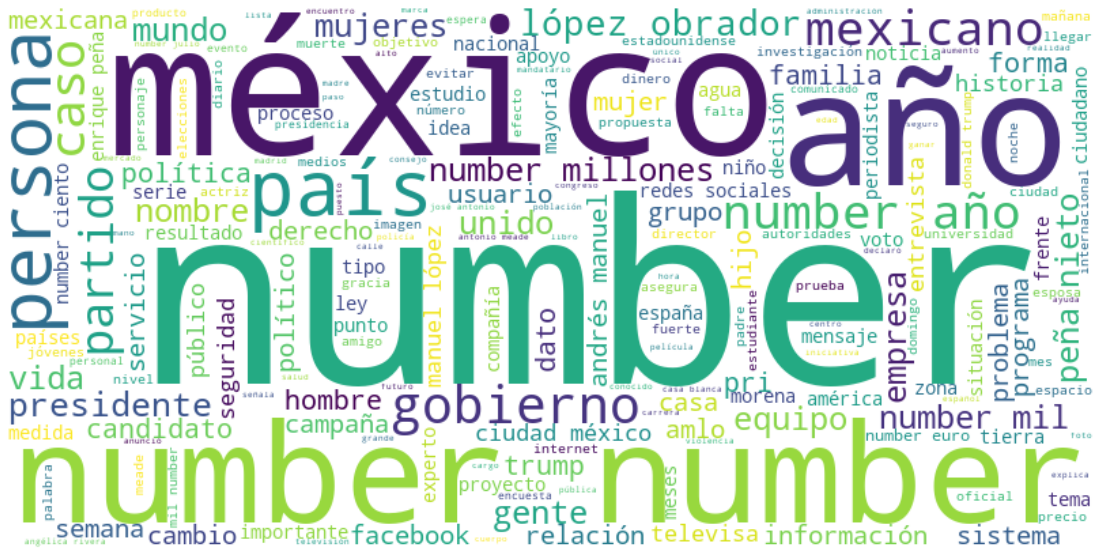

In [27]:
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud_sin_stopwords.png')
plt.show()

### Estudio de la longitud de las noticias

In [51]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [28]:
len_text = train['Text']

In [29]:
len_text

0      RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONAR...
1      La palabra "haiga", aceptada por la RAE La Rea...
2      YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...
3      UNAM capacitará a maestros para aprobar prueba...
4      Alerta: pretenden aprobar libros escolares con...
                             ...                        
671    Madonna será la nueva imagen del Chocolate Abu...
672    Filtran material íntimo de Zelina Vega, luchad...
673    CBS PLANEA GRAN HERMANO EN LA CASA BLANCA CON ...
674    TV Azteca anuncia que cambiará su nombre por u...
675    MUERTE DE PETER EL ANGUILA POR SOBREDOSIS\nPet...
Name: Text, Length: 676, dtype: object

In [52]:
tokenizer = Tokenizer(num_words=None, lower=True, char_level=False)
tokenizer.fit_on_texts(len_text)
word_seq_train = tokenizer.texts_to_sequences(len_text)

In [58]:
lst = []
for news in word_seq_train:
    lst.append(len(news))
print(len(news))

216


In [33]:
import matplotlib.pyplot as plt
import statistics

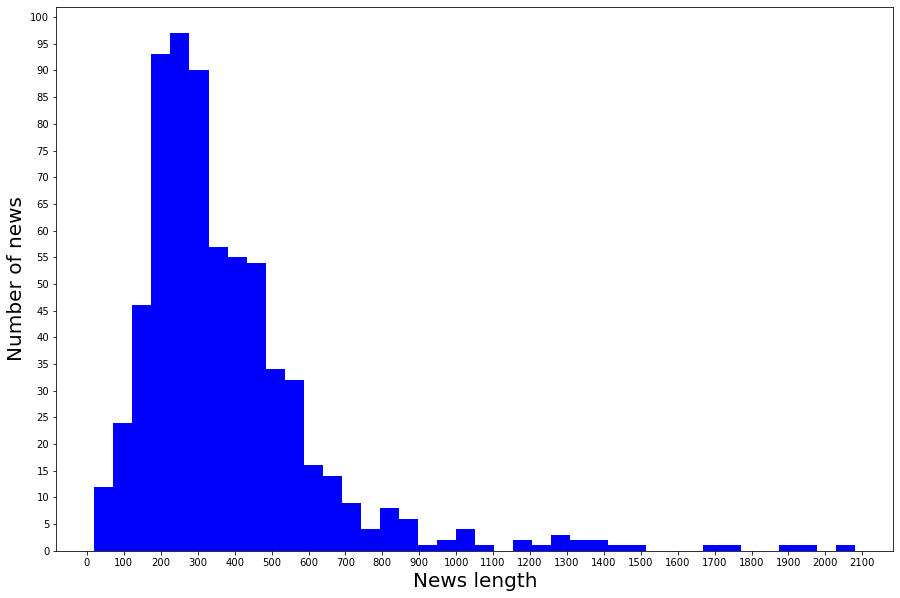

In [120]:
# plt.figure(figsize=(12,7))
fig = plt.figure(figsize=(15,10))
bins = plt.hist(lst, bins=40, histtype='barstacked', color=['blue'], log=False)
plt.xticks(np.arange(0, 2110, step=100))
plt.yticks(np.arange(0, 101, step=5))
plt.xlabel('News length', fontsize=20)
plt.ylabel('Number of news', fontsize=20)
# plt.title('Histogram for the study of news length.', fontsize=25)
# plt.savefig('len_study_no_title_big.png', bbox_inches='tight')
plt.show()

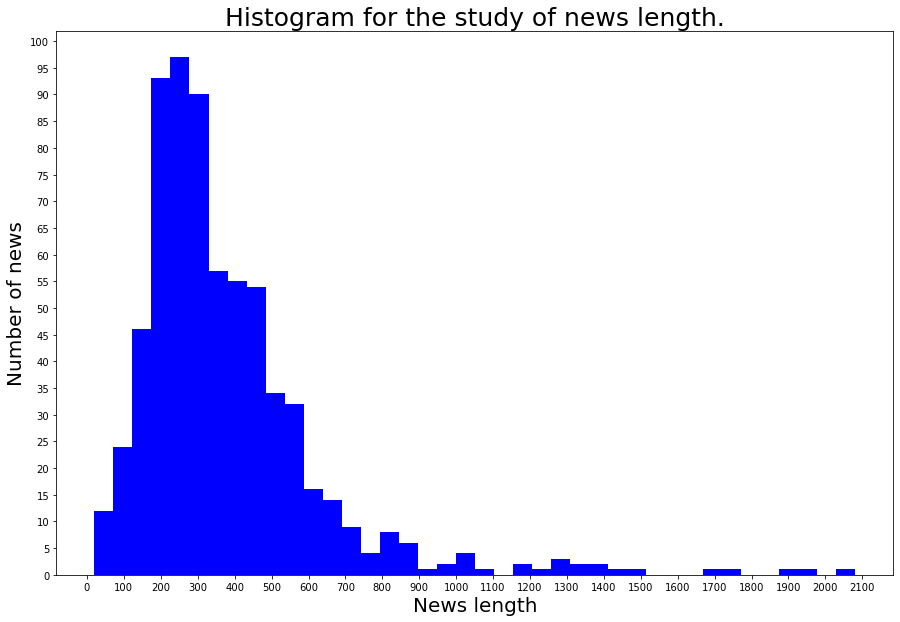

In [133]:
# plt.figure(figsize=(12,7))
fig, ax = plt.subplots(figsize=(15,10), sharey='col')
bins = plt.hist(lst, bins=40, histtype='barstacked', color=['blue'], log=False)
ax.set_xticks(np.arange(0, 2110, step=100))
ax.set_yticks(np.arange(0, 101, step=5))
ax.set_xlabel('News length', fontsize=20)
ax.set_ylabel('Number of news', fontsize=20)
ax.set_title('Histogram for the study of news length.', fontsize=25)
# plt.savefig('len_study_no_title_big.png', bbox_inches='tight')
plt.show()

In [67]:
bins[1]

array([  20.   ,   71.525,  123.05 ,  174.575,  226.1  ,  277.625,
        329.15 ,  380.675,  432.2  ,  483.725,  535.25 ,  586.775,
        638.3  ,  689.825,  741.35 ,  792.875,  844.4  ,  895.925,
        947.45 ,  998.975, 1050.5  , 1102.025, 1153.55 , 1205.075,
       1256.6  , 1308.125, 1359.65 , 1411.175, 1462.7  , 1514.225,
       1565.75 , 1617.275, 1668.8  , 1720.325, 1771.85 , 1823.375,
       1874.9  , 1926.425, 1977.95 , 2029.475, 2081.   ])

In [56]:
print(f'La media de tamaño de las noticias es de: {statistics.mean(lst)}')

La media de tamaño de las noticias es de: 378.4334319526627


In [57]:
print(f'La mediana de tamaño de las noticias es de: {statistics.median(lst)}')

La mediana de tamaño de las noticias es de: 314.5


In [83]:
print(f'El máximo tamaño de las noticias es de: {max(lst)}')

El máximo tamaño de las noticias es de: 2081


In [31]:
# Para la polaridad
from textblob import TextBlob

In [32]:
train['polarity'] = train['text_comment'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [35]:
print("3 Random Reviews with Highest Polarity:")
for index, review in enumerate(train.iloc[train['polarity'].sort_values(ascending=True)[:3].index]['Text']):
    print('Review {}\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1
 La CNN utiliza imágenes de Murcia para mostrar la devastación del huracán Irma
EL ALCALDE DE LA CIUDAD, ORGULLOSO DE QUE MURCIA "ESTÉ EN EL FOCO INTERNACIONAL"
Ante la dificultad de tomar buenas fotografías en las zonas del Caribe afectadas, con algunas rachas de viento que alcanzan los 350km/h, la CNN ha decidido utilizar imágenes de Murcia, concretamente de un descampado del barrio de Espinardo, para mostrar la devastación del huracán Irma.
"El terreno árido, seco y escarpado de esta localidad es perfecto para exponer las terribles consecuencias de un ciclón tropical", asegura Phillip Wilson, director de informativos de la cadena estadounidense. "Murcia es como el después de una terrible catástrofe pero con unas condiciones favorables para grabar imágenes", se sincera.
El alcalde de la ciudad, José Ballesta, destaca "el orgullo de haber situado esta región en el foco de los medios internacionales", añadiendo que "si esto no es Marca E

In [36]:
product_polarity_sorted = pd.DataFrame(train.groupby('Topic')['polarity'].mean().sort_values(ascending=True))

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel('Polarity')
plt.ylabel('Threads')
plt.title('Polarity of Different comments.')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)), product_polarity_sorted['polarity'], color='purple')

# Writing Threads_id on bar
for bar, product in zip(polarity_graph, product_polarity_sorted.index):
    plt.text(0.005, bar.get_y()+bar.get_width(),'{}'.format(product), va='center', fontsize=20, color='black')

# Writing polarity on bar
for bar, polatiry in zip(polarity_graph, product_polarity_sorted['polarity']):
    plt.text(bar.get_width()+0.001, bar.get_y()+bar.get_width(),'%3f'%polatiry, va='center', fontsize=20, color='black')
    
plt.yticks([])
plt.show()

In [38]:
import textstat

In [39]:
train['dale_chall_score'] = train['Text'].apply(lambda x: textstat.dale_chall_readability_score(x))
train['flesh_reading_ease'] = train['Text'].apply(lambda x: textstat.flesch_reading_ease(x))
train['gunning_fog'] = train['Text'].apply(lambda x: textstat.gunning_fog(x))

In [40]:
df = train

In [42]:
print('Dale Chall Score de comentarios no fakes=>',df[df['Category']=='Fake']['dale_chall_score'].mean())
print('Dale Chall Score de comentarios fakes=>',df[df['Category']=='True']['dale_chall_score'].mean())

print('Flesch Reading Score de comentarios no fakes=>',df[df['Category']=='Fake']['flesh_reading_ease'].mean())
print('Flesch Reading Score de comentarios fakes=>',df[df['Category']=='True']['flesh_reading_ease'].mean())

print('Gunning Fog Index de comentarios no fakes=>',df[df['Category']=='Fake']['gunning_fog'].mean())
print('Gunning Fog Index de comentarios fakes=>',df[df['Category']=='True']['gunning_fog'].mean())

Dale Chall Score de comentarios no fakes=> 10.790266272189347
Dale Chall Score de comentarios fakes=> 10.252781065088756
Flesch Reading Score de comentarios no fakes=> 28.94325443786982
Flesch Reading Score de comentarios fakes=> 30.262810650887573
Gunning Fog Index de comentarios no fakes=> 21.99559171597633
Gunning Fog Index de comentarios fakes=> 20.431213017751478


In [ ]:
recommend_percentage = pd.DataFrame(((train.groupby('Category')[])))

In [ ]:
"""
plt.figure(figsize=(16,8))
plt.xlabel('Recommend Percentage')
plt.ylabel('Products')
plt.title('Percentage of reviewers recommended a product')
recommend_graph=plt.barh(np.arange(len(recommend_percentage.index)),recommend_percentage['reviews.doRecommend'],color='green')

# Writing product names on bar
for bar,product in zip(recommend_graph,recommend_percentage.index):
  plt.text(0.5,bar.get_y()+0.4,'{}'.format(product),va='center',fontsize=11,color='white')

# Writing recommendation percentage on graph
for bar,percentage in zip(recommend_graph,recommend_percentage['reviews.doRecommend']):
  plt.text(bar.get_width()+0.5,bar.get_y()+0.4,'%.2f'%percentage,va='center',fontsize=11,color='black')

plt.yticks([])
plt.show()
"""